In [1]:
import matplotlib
import matplotlib.pyplot as mplt
%matplotlib inline  
import numpy as np
from tools import *

# Partie 1 : SIFT

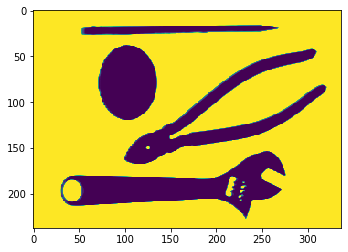

In [2]:
# example images
I = read_grayscale('data/tools.tiff')
I2 = read_grayscale('data/Scene/CALsuburb/image_0205.jpg')
mplt.imshow(I)

In [3]:
np.shape(I)

(238, 337)

In [4]:
hx = np.array([1,0,1])
hy = np.array([1,2,1])
G = conv_separable(I,hx,hy)



In [5]:
np.shape(G)


(238, 337)

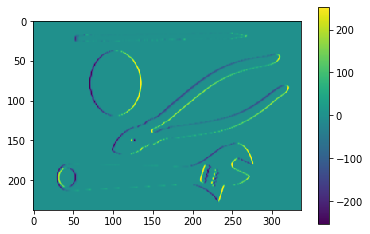

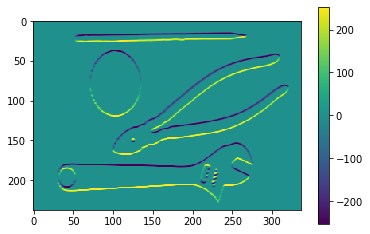

In [6]:


def compute_grad(I):
    hx = 0.25* np.array([-1,0,1])
    hy = np.array([1,2,1])
    Ix = conv_separable(I,hx,hy)
    Iy = conv_separable(I,hy,hx)
    
    return Ix, Iy

# example d'affichage du résultat

Ix, Iy = compute_grad(I)
mplt.imshow(Ix)
mplt.colorbar()
mplt.show()
mplt.imshow(Iy)
mplt.colorbar()
mplt.show()

In [7]:
Ix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
def compute_grad_mod_ori(I):
    Ix,Iy = compute_grad(I)
    Gn =np.sqrt(Ix**2+Iy**2)
    Go = compute_grad_ori(Ix, Iy, Gn)
    return Gn, Go

In [9]:
gn,go=compute_grad_mod_ori(I)
gn.shape

(238, 337)

In [10]:
def compute_sift_region(Gm, Go, mask=None):
    #print("Go :",Go)
    if mask is not None:
        g_mask = gaussian_mask() 
    else:
        g_mask = np.ones((16,16))
    Gmpond = Gm * g_mask
    P = []
    for i in range(4):
        for j in range(4):
            hist = np.zeros((8,))
            for ii in range(4):
                for jj in range(4):
                    #print("Go",Go)
                    if Go[4*j+jj][4*i+ii]!=-1:
                        hist[Go[4*j+jj][4*i+ii]]+= Gmpond[4*j+jj][4*i+ii]
            P.append(hist)
    P = np.array(P)
    P = P.reshape((128,))
    #print(P)
    #print(np.shape(P))
    # Post processing 
    
    
    norme = np.linalg.norm(P)
    
    if norme < 0.5 : 
        return np.zeros((128,))
    else : 
        P = P / norme
        for v in range(len(P)) : 
            if P[v] > 0.2 : 
                P[v] = 0.2
        norme = np.linalg.norm(P)
        P = P / norme
    #print("P: ",P)
    return P

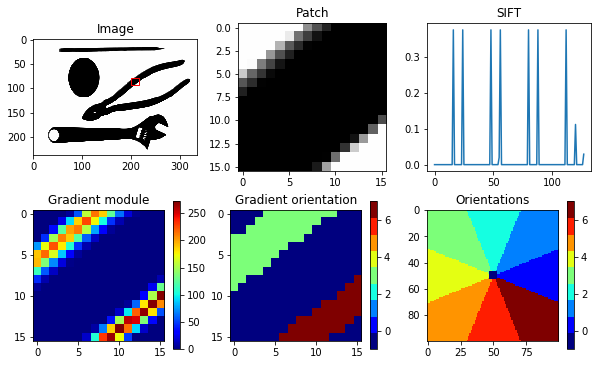

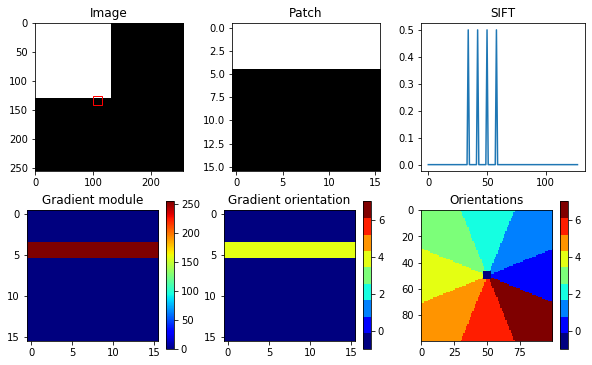

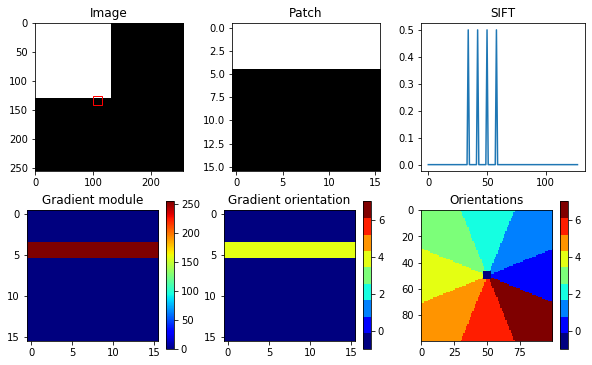

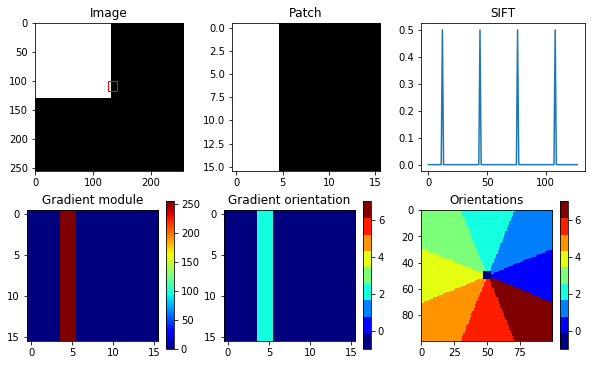

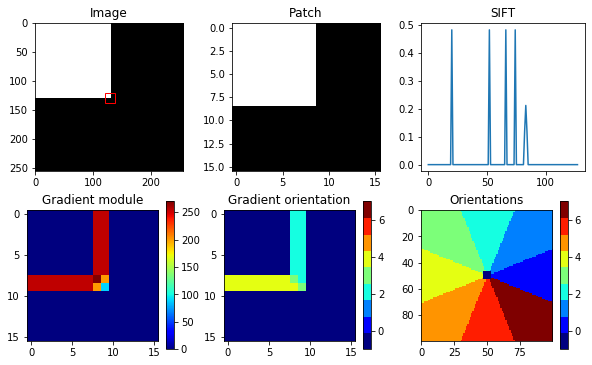

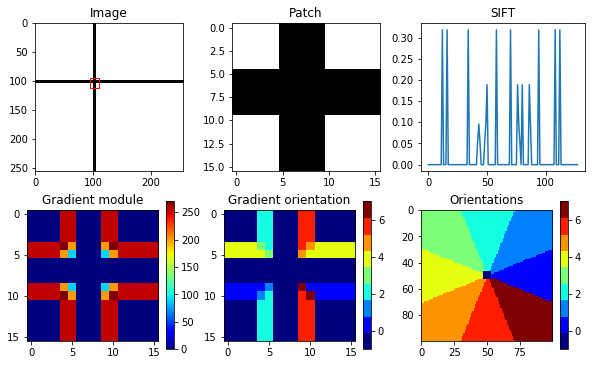

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.3181317 , 0.        , 0.        ,
       0.        , 0.3181317 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.3181317 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05344409, 0.09560369, 0.05344409,
       0.        , 0.        , 0.        , 0.05344409, 0.09560369,
       0.18864812, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.3181317 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.3181317 , 0.        , 0.        , 0.        , 0.     

In [11]:
# Example of viz of SIFTs
# set gausm to True to apply mask weighting of gradients
display_sift_region(I,           compute_grad_mod_ori, compute_sift_region, x=200, y=78, gausm=True)
display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=100, y=125, gausm=False)
display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=100, y=125, gausm=False)
display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=125, y=100, gausm=False)
display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=121, y=121, gausm=False)
display_sift_region(toy_im(),    compute_grad_mod_ori, compute_sift_region, x=95, y=95, gausm=False)

In [12]:
def compute_sift_image(I):
    x, y = dense_sampling(I)
    im = auto_padding(I)
    
    # TODO calculs communs aux patchs
    sifts = np.zeros((len(x), len(y), 128))
    gn, go = compute_grad_mod_ori(im)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            tmpgn = gn[xi:xi+16,yj:yj+16]
            tmpgo = go[xi:xi+16,yj:yj+16]
            sifts[i, j, :] = compute_sift_region(tmpgn,tmpgo) # TODO SIFT du patch de coordonnee (xi, yj)
    return sifts

In [13]:
sif = compute_sift_image(I)


In [14]:
sif = sif.reshape((sif.shape[0]*sif.shape[1],sif.shape[2]))

In [15]:
len(sif)

1290

# Partie 2 : Dictionnaire visuel

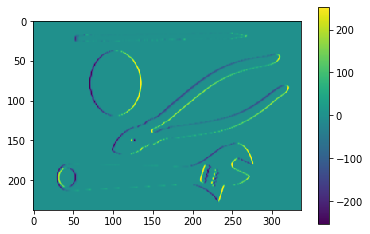

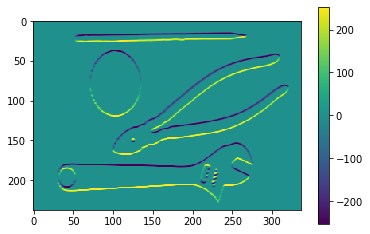

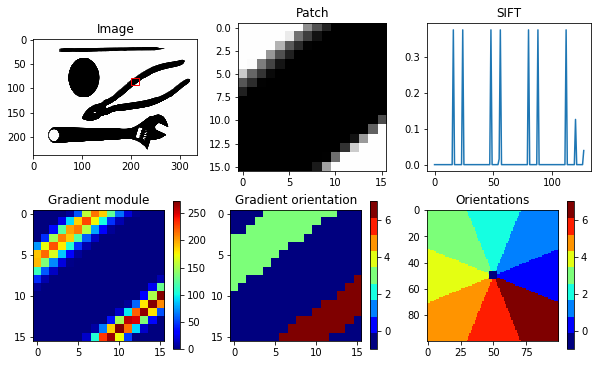

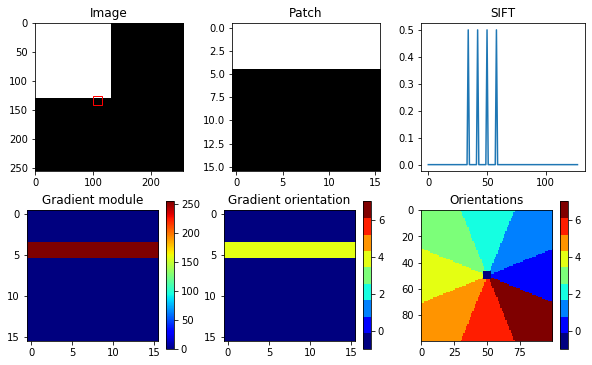

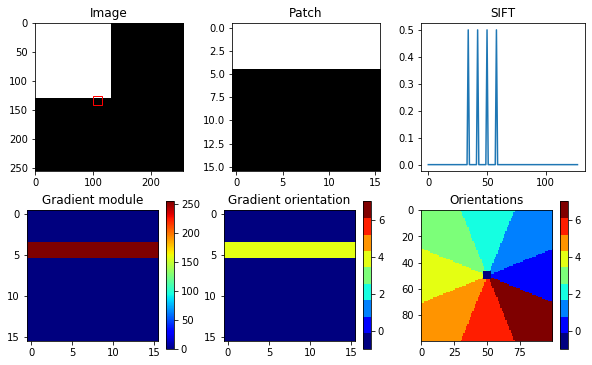

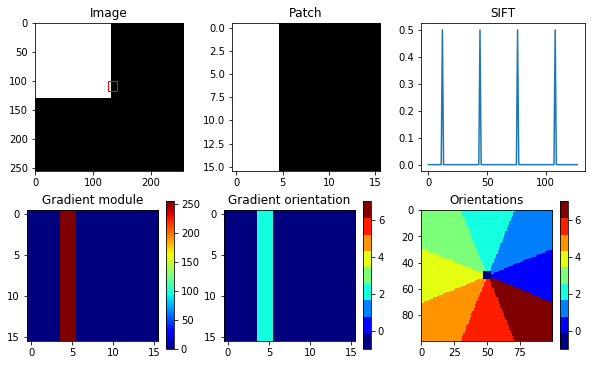

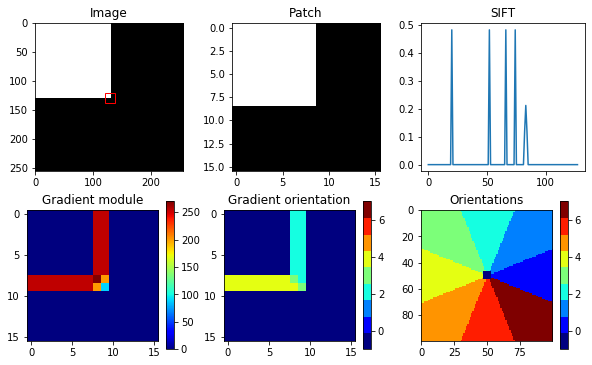

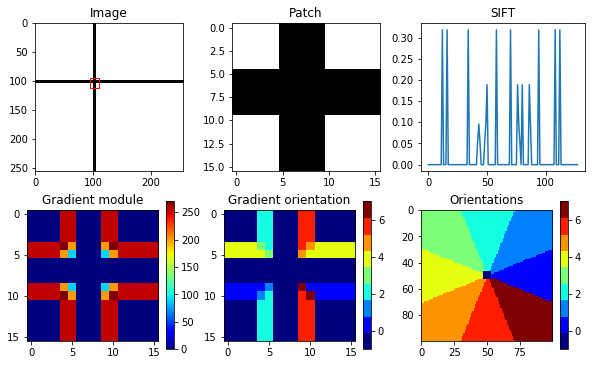

In [16]:
# Ideally, restart the Python kernel to start from a clean slate
import os
import numpy as np
from tools import *
from sift import *
from sklearn import metrics 
from sklearn.cluster import KMeans

In [17]:
# Paths config
dir_sc = os.path.join('data', 'Scene')
dir_sift = os.path.join('data', 'sift')
path_vdict = os.path.join('data', 'kmeans', 'vdict.npy')
path_vdsift = os.path.join('data', 'kmeans', 'vdsift.npy')
path_vdinames = os.path.join('data', 'kmeans', 'vdinames.npy')

inames, ilabls, cnames = load_dataset(dir_sc)

In [18]:
# If you want to look at the SIFTs that will be fed to compute_visual_dict:
sifts_list_by_image = compute_load_sift_dataset(dir_sc, dir_sift, inames, compute_sift_image)

Computing or loading SIFTs


In [19]:
from sklearn import metrics 
from sklearn.cluster import KMeans
def compute_visual_dict(sift, n_clusters=1000, n_init=1, verbose=1):
    # reorder data
    dim_sift = sift[0].shape[-1]
    sift = [s.reshape(-1, dim_sift) for s in sift]
    sift = np.concatenate(sift, axis=0)
    # remove zero vectors
    keep = ~np.all(sift==0, axis=1)
    sift = sift[keep]
    # randomly pick sift
    ids, _ = compute_split(sift.shape[0], pc=0.05)
    sift = sift[ids]
    
    kmeans = KMeans(n_clusters=n_clusters, n_init = n_init).fit(sift)
    cluster_centers = list(kmeans.cluster_centers_)
    cluster_centers.append([0 for i in range(len(cluster_centers[0]))])
    return np.array(cluster_centers)
    # TODO compute kmeans on `sift`, get cluster centers, add zeros vector

In [20]:
# Run the visual dict computation (saved the first time)
vidct = compute_or_load_vdict(dir_sc, dir_sift, inames, compute_sift_image, path_vdict, compute_visual_dict)

Computing or loading visual dict
Computing or loading SIFTs


In [21]:
vidct

array([[ 3.02702703,  3.25225225,  6.59459459, ...,  6.96396396,
         6.82882883,  6.37837838],
       [ 8.75      , 12.3220339 , 15.59322034, ..., 10.31355932,
        10.48305085, 10.03813559],
       [58.54181818,  8.34545455,  2.75272727, ...,  6.97454545,
         8.39272727,  8.71636364],
       ...,
       [ 3.95575221,  2.82300885,  3.39823009, ...,  7.32743363,
        19.14159292, 10.18584071],
       [12.30434783,  8.26086957,  6.66666667, ...,  6.47826087,
        12.57971014,  8.07246377],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [22]:
# It's better to normalize the cluster
def normalize_clusters(vidct):
    for i,l in enumerate(vidct):
        norm = np.linalg.norm(l)
        if norm> 0 :
            vidct[i] = vidct[i]/norm
    return vidct
            

In [23]:
vidct = normalize_clusters(vidct)

In [24]:
vidct.shape

(1001, 128)

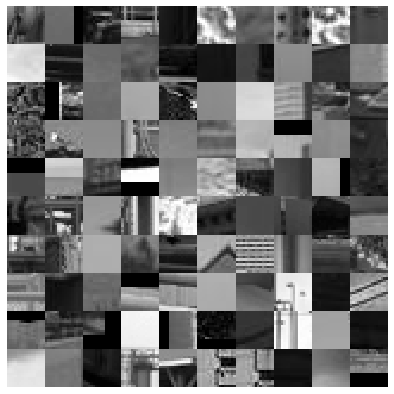

In [25]:
# Study of the dict
regions, sifts = get_regions_and_sifts(dir_sc, np.random.choice(inames, 30)) # Compute SIFT and regions from 30 random images
display_images(regions[np.random.choice(len(regions), 100)]) # Show 100 random regions

# TODO visually analyze the dict through similar example regions
#
# Ideally, create `vdregions`, a numpy array of size 1001 x 16 x 16 where each of the 1001 elements is a
# "prototype" patch that is very close to the cluster center



In [26]:
vidct.shape

(1001, 128)

In [27]:
from scipy.spatial.distance import cdist
def create_vdregions(vidct,regions,sifts):
    vdregions = []
    dist_sifts_clusters = cdist(vidct,sifts,metric='euclidean')
    for i,l in enumerate(dist_sifts_clusters):
        vdregions.append(regions[np.argmin(l)]) 
        
    return np.array(vdregions)

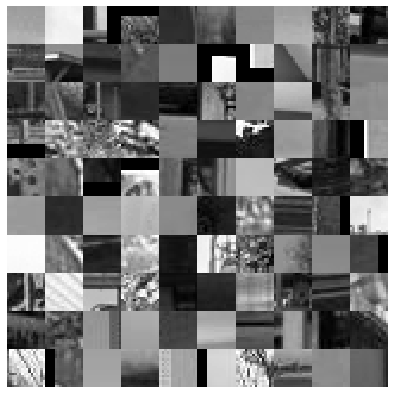

In [28]:
vdregions = create_vdregions(vidct,regions,sifts)
display_images(regions[np.random.choice(len(regions), 100)])

# Partie 3 : BoW

In [29]:
vdregions.shape

(1001, 16, 16)

In [49]:
# Compute BoW for an image

def compute_feats(vidct, image_sifts):
    print("shape:",image_sifts.shape)
    image_sifts = image_sifts.reshape((image_sifts.shape[0]*image_sifts.shape[1],image_sifts.shape[2]))
    print("shape:",image_sifts.shape)
    H = np.zeros((len(image_sifts),len(vidct)))
    dist_clusters_sifts = cdist(image_sifts,vidct,metric='euclidean')
    for i,l in enumerate(dist_clusters_sifts): 
        H[i][np.argmin(l)] = 1
    print(H)  
    z = np.sum(H,axis=0) # pooling sur l'ensemble des descripteurs locaux
    print(z)
    print(z.sum())
    z /= np.linalg.norm(z) # on normalise z et z est de dimension 1001 (nombre de clusters)
    print(z)
    return z # descripteur global de notre image

shape: (32, 32, 128)
shape: (1024, 128)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0. 1. 0. ... 0. 0. 0.]
1024.0
[0.         0.01119294 0.         ... 0.         0.         0.        ]


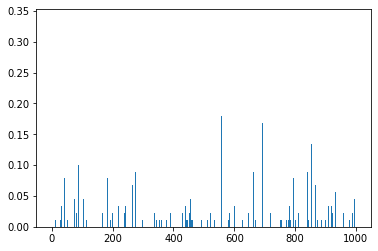

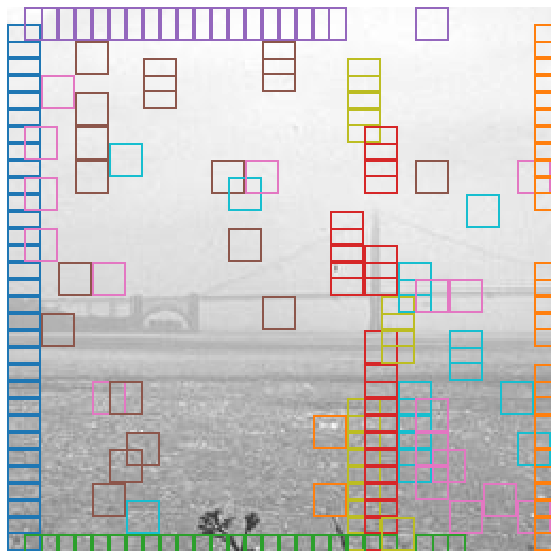

(9, 16, 16)


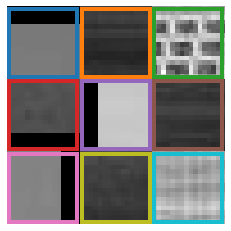

(32, 32, 128)


In [52]:
# Visualize your BoW on an image

iname = inames[557]
ipath = os.path.join(dir_sc, iname)
im = read_grayscale(ipath)
sift = compute_sift_image(im)
regions = compute_regions(im)
feats = compute_feats(vidct, sift)

display_vdregions_image(im, vidct, sift, feats, vdregions=vdregions) # if you have vdregions, add it as input here
print(sift.shape)